Import necessary package

In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[1]

0

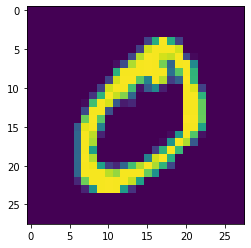

In [6]:
plt.imshow(X_train[1])

Data pre processing

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [9]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [10]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Create model

In [11]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [13]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 199s 106ms/step - loss: 0.3152 - accuracy: 0.9480 - val_loss: 0.0943 - val_accuracy: 0.9716
Epoch 2/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0764 - accuracy: 0.9768 - val_loss: 0.1250 - val_accuracy: 0.9611
Epoch 3/5
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0530 - accuracy: 0.9839 - val_loss: 0.1144 - val_accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 196s 105ms/step - loss: 0.0419 - accuracy: 0.9869 - val_loss: 0.0959 - val_accuracy: 0.9742
Epoch 5/5
1875/1875 [==============================] - 198s 105ms/step - loss: 0.0320 - accuracy: 0.9894 - val_loss: 0.1063 - val_accuracy: 0.9783


Test the model

In [14]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10627547651529312, 0.9782999753952026]


In [15]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 114ms/step
[[5.9102414e-13 9.7573243e-24 7.1878814e-12 2.1259326e-13 1.5836666e-24
  5.9005961e-18 2.8915620e-25 1.0000000e+00 2.7710244e-14 1.5588626e-11]
 [8.9968632e-16 3.9253631e-14 1.0000000e+00 7.3605257e-16 1.6752117e-19
  1.8444945e-23 1.2974756e-10 4.7839676e-21 3.3533408e-15 8.7067373e-22]
 [1.0792753e-07 9.9997461e-01 2.9945551e-07 1.2902958e-10 3.3635072e-06
  1.7300696e-08 1.1915942e-08 8.2101963e-07 2.0719390e-05 9.9928030e-09]
 [1.0000000e+00 4.1925269e-23 4.4750628e-14 2.4442555e-17 7.9729913e-18
  3.0037688e-17 3.1604032e-15 5.4357802e-18 1.3353810e-12 2.9628134e-12]]


In [16]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
